<a href="https://colab.research.google.com/github/kavyakalivarapu-lab/ML-project/blob/main/sm_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1='/content/drive/MyDrive/ML/sem_project/Train.csv'
path2='/content/drive/MyDrive/ML/sem_project/Test.csv'
train=pd.read_csv(path1)
test=pd.read_csv(path2)

In [ ]:
train.shape

(2000, 3)

In [ ]:
train.dtypes

,0
Id,int64
Body,object
Sentiment Type,object


In [ ]:
train.isnull().sum()

,0
Id,0
Body,228
Sentiment Type,0


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

,0
Id,0
Body,0
Sentiment Type,0


In [ ]:
test.shape

(2000, 2)

In [ ]:
test.dtypes

,0
Id,int64
Body,object


In [ ]:
test.isnull().sum()

,0
Id,0
Body,228


In [ ]:
test.dropna(inplace=True)

In [ ]:
test.isnull().sum()

,0
Id,0
Body,0


In [ ]:
train.drop(['Id'],axis=1,inplace=True)

In [ ]:
train.shape

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
2,no politics danger now i can make a propaganda...,negative
3,i am the senate gets stabbed,neutral
4,is this a suicide,neutral
5,removed,neutral


In [ ]:
test.drop(['Id'],axis=1,inplace=True)

In [ ]:
test.head()

,Body
0,rule 2 no metes about polarizing political top...
2,no politics danger now i can make a propaganda...
3,i am the senate gets stabbed
4,is this a suicide
5,removed


In [ ]:
train.rename(columns={'Body':'Tweets','Sentiment Type':'Target'},inplace=True),test.rename(columns={'Body':'Tweets','Sentiment Type':'Target'},inplace=True)

(None, None)

In [ ]:
train.head(),test.head()

(                                              Tweets    Target
 0  rule 2 no metes about polarizing political top...   neutral
 2  no politics danger now i can make a propaganda...  negative
 3                       i am the senate gets stabbed   neutral
 4                                  is this a suicide   neutral
 5                                            removed   neutral,
                                               Tweets
 0  rule 2 no metes about polarizing political top...
 2  no politics danger now i can make a propaganda...
 3                       i am the senate gets stabbed
 4                                  is this a suicide
 5                                            removed)

In [ ]:
train['Target'].value_counts()

,count
Target,
neutral,782
positive,632
negative,358


In [ ]:
import re
import nltk
!pip install emoji
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
from bs4 import BeautifulSoup


#downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
 # Convert to string, lower case, and strip whitespace
  text = str(text).lower().strip()

    # Replace specific symbols
  text = text.replace('%', 'percent').replace('$', 'dollar')

    # Remove emojis
  text = emoji.replace_emoji(text, replace='')

    # Replace large numbers with abbreviations
  text = re.sub(r'(\d{1,3}(?:,\d{3})*)', lambda x: format_large_number(x.group(0)), text)

    # Remove unwanted characters
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  text = re.sub(r'<[^>]*>', ' ', text)  # Remove HTML tags

    # Handle contractions
  contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "isn't": "is not",
        "it's": "it is",
        "I'm": "I am",
        "you're": "you are",
        "they're": "they are"
    }

    # Decontract words
  text_decontracted = [contractions.get(word, word) for word in text.split()]
  text = ' '.join(text_decontracted)

    # Normalize the text
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove HTML tags
  text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove stop words and lemmatize
  text = ' '.join(word for word in text.split() if word not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

  return text
def format_large_number(num_str):
  num_str = num_str.replace(',', '')
  num = int(num_str)
  if num >= 1_000_000_000:
    return f'{num // 1_000_000_000}b'
  elif num >= 1_000_000:
    return f'{num // 1_000_000}m'
  elif num >= 1_000:
    return f'{num // 1_000}k'
  return num_str

In [ ]:
train["cleaned_Tweet"]=train["Tweets"].apply(clean_text)

In [ ]:
print("Cleaned text in training data:")
train[['Tweets','cleaned_Tweet']].head()

Cleaned text in training data:


,Tweets,cleaned_Tweet
0,rule 2 no metes about polarizing political top...,rule mete polarizing political topic vulnerabl...
2,no politics danger now i can make a propaganda...,politics danger make propaganda meme telling p...
3,i am the senate gets stabbed,senate get stabbed
4,is this a suicide,suicide
5,removed,removed


In [ ]:
test["cleaned_Tweet"]=test["Tweets"].apply(clean_text)
print("cleaned text in test data:")
test[['Tweets','cleaned_Tweet']].head()



cleaned text in test data:


,Tweets,cleaned_Tweet
0,rule 2 no metes about polarizing political top...,rule mete polarizing political topic vulnerabl...
2,no politics danger now i can make a propaganda...,politics danger make propaganda meme telling p...
3,i am the senate gets stabbed,senate get stabbed
4,is this a suicide,suicide
5,removed,removed


**Data Visualization**

<ipython-input-47-49e4560375bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=train,x='Target',palette='coolwarm')


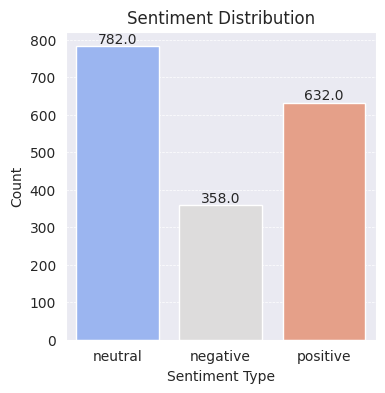

In [ ]:
plt.figure(figsize=(4,4))
sns.set_style("darkgrid")
ax=sns.countplot(data=train,x='Target',palette='coolwarm')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.show()

Largest Tweet Lengths [525 518 504 481 472 453 423 365 347 332 321 316 314 313 302 301 293 279
 276 272 268 266 262 259 255 253 244]


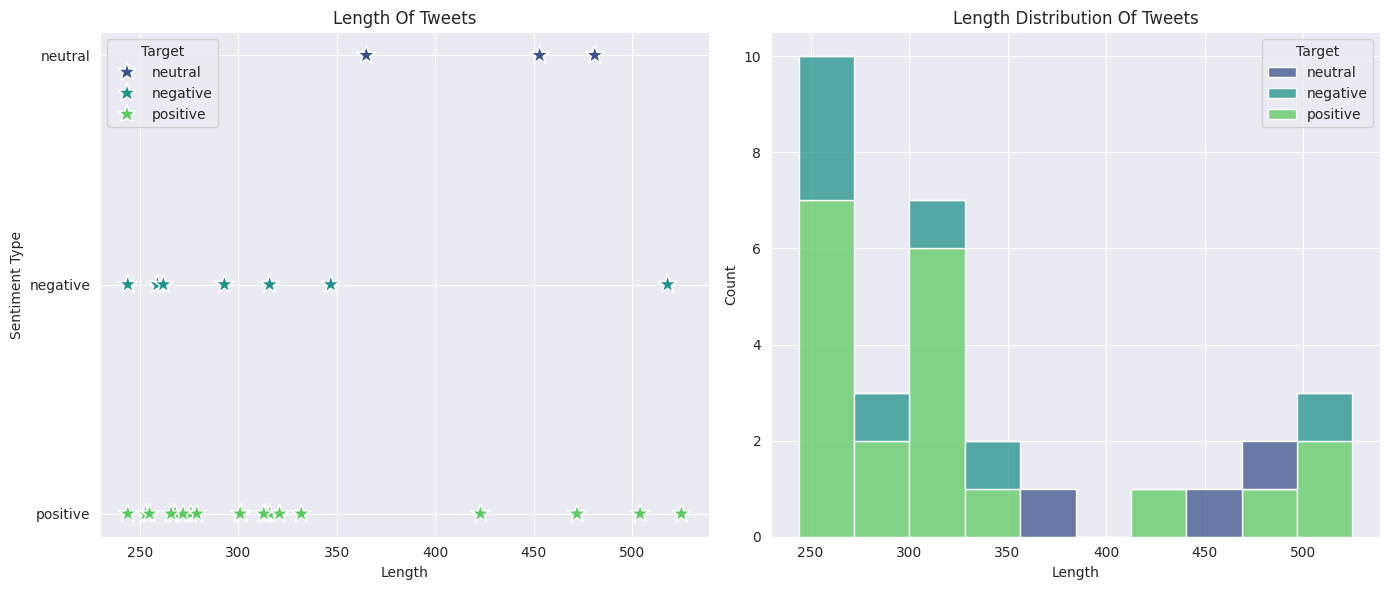

In [59]:
largest_tweet_len=train['cleaned_Tweet'].str.len().nlargest(30).unique()
filtered_data=train[train['cleaned_Tweet'].str.len().isin(largest_tweet_len)]
print("Largest Tweet Lengths",largest_tweet_len)
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x=filtered_data['cleaned_Tweet'].str.len(),y=filtered_data['Target']
                ,ax=axes[0],hue=train['Target'],palette='viridis',marker='*',s=200)
axes[0].set_title("Length Of Tweets")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Sentiment Type")

sns.histplot(x=filtered_data['cleaned_Tweet'].str.len(),ax=axes[1],hue=train['Target'],
             multiple='stack',bins=10,palette='viridis')
axes[1].set_title("Length Distribution Of Tweets")
axes[1].set_xlabel("Length")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Feauture Selection**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(train['cleaned_Tweet'])
X_test=tfidf.transform(test['cleaned_Tweet'])
print("\n TF-IDF feature matrix shape for training data:",X_train.shape)
print("\n TF-IDF feature matrix shape for test data:",X_test.shape)


 TF-IDF feature matrix shape for training data: (1772, 3683)

 TF-IDF feature matrix shape for test data: (1772, 3683)


**Select Best Model**

In [62]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [67]:
models={'random forest':RandomForestClassifier(),
        'gradboost':GradientBoostingClassifier(),
        'svc':SVC(),
        'knn':KNeighborsClassifier(),
        'naive bayes':GaussianNB(),
        'decison tree':DecisionTreeClassifier()}

In [69]:
y_train=train['Target']
best_model=None
best_accuracy=0
results=[]
for name,model in models.items():
  if name=='naive bayes':
   model.fit(X_train.toarray(),y_train)
   y_pred=model.predict(X_train.toarray())
  else:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_train)

  accuracy=accuracy_score(y_train,y_pred)
  results.append({'Model':name,'Accuracy':accuracy})
  print(f'{name}.......\n')
  if accuracy>best_accuracy:
    best_accuracy=accuracy
    best_model=model
best_model_d=pd.DataFrame(results)
print(best_model_d)

random forest.......

gradboost.......

svc.......

knn.......

naive bayes.......

decison tree.......

           Model  Accuracy
0  random forest  1.000000
1      gradboost  0.815463
2            svc  0.990971
3            knn  0.468962
4    naive bayes  0.843115
5   decison tree  1.000000


<ipython-input-78-72ee3a70cd16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=best_model_d['Accuracy'],y=best_model_d['Model'],palette='Paired')


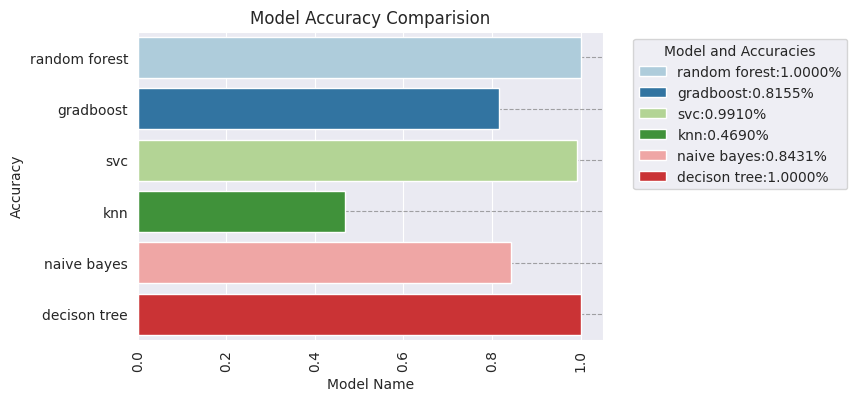

In [78]:
plt.figure(figsize=(6,4))
barplot=sns.barplot(x=best_model_d['Accuracy'],y=best_model_d['Model'],palette='Paired')
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparision")
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',alpha=0.7,color='gray')
for i,(model,accuracy) in enumerate(zip(best_model_d['Model'],best_model_d['Accuracy'])):
  barplot.patches[i].set_label(f'{model}:{accuracy:.4f}%')
plt.legend(title='Model and Accuracies',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()


**Feature Importance**

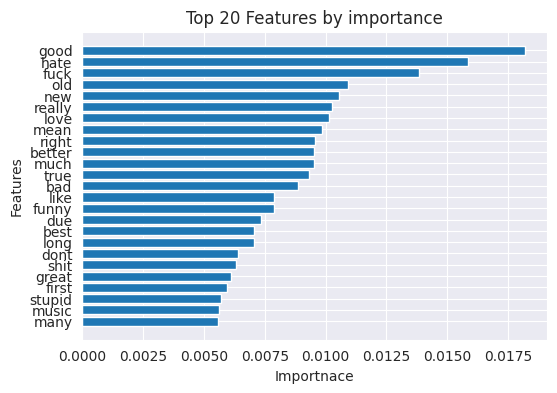

In [81]:
features_names=tfidf.get_feature_names_out()
coefficients=best_model.feature_importances_
# Create a DataFrame to hold feature names and their importance
feature_importance=pd.DataFrame({'Feature':features_names,'Importance':np.abs(coefficients)})
#sort by importance
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
top_features=feature_importance.head(25)
plt.figure(figsize=(6,4))
plt.barh(top_features['Feature'],top_features['Importance'])
plt.xlabel("Importnace")
plt.ylabel("Features")
plt.title("Top 20 Features by importance")
plt.gca().invert_yaxis() #To display the highest importance at the top
plt.show()



**Predict Test Data**

In [93]:
nb=GaussianNB()
nb.fit(X_train.toarray(),y_train)
y_test_pred=nb.predict(X_test.toarray())
accuracy=accuracy_score(train['Target'],y_test_pred)
print(f'Accuracy on test data:{accuracy:.4f}')
test_results=test.copy() #using test dataset ,creating an another copy named test_results
test_results['Sentiment Type']=y_test_pred
test_results[['Tweets','Sentiment Type']].to_csv('test_predictions.csv',index=False)

Accuracy on test data:0.8431


In [88]:
import joblib
joblib.dump(best_model,'best_model.pkl')
joblib.dump(tfidf,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [89]:
import os
os.getcwd()

'/content'